# VQVAE

2


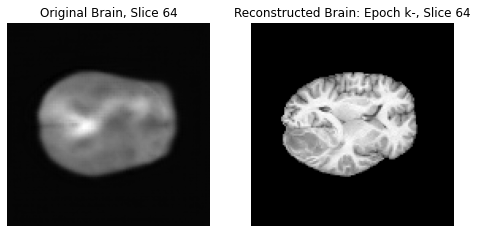

interactive(children=(IntSlider(value=64, description='Slice Index', max=127), Output()), _dom_classes=('widge…

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
import re

def list_files_for_criteria(parent_path, criteria):
    filepaths = []
    for dirpath, dirnames, filenames in os.walk(parent_path):
        for filename in filenames:
            if any(criterion in dirpath for criterion in criteria) and ('epoch53' in filename or 'epoch78' in filename or 'original' in filename):
                filepaths.append(os.path.join(dirpath, filename))
    return filepaths

parent_path = '/N/slate/aajais/reconst-vqvae-monai-scaled-128'
criteria = ['/B12-KR-AUG-all-T-mask-']

# Find files that match the criteria
filepaths = list_files_for_criteria(parent_path, criteria)
print(filepaths)
# Load the images
brain_images = []
labels= []
for filepath in filepaths:
    brain_images.append(np.load(filepath))
    label = 'Original' if 'original' in filepath else 'Epoch '
    labels.append(f"{label}: {os.path.basename(filepath)}")

def plot_brain_slices(slice_index):
    n_images = len(filepaths)
    print(n_images)
    cols = int(np.ceil(np.sqrt(n_images)))
    rows = int(np.ceil(n_images / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

    for i, ax in enumerate(axes.flatten()):
        if i < n_images:
            ax.imshow(brain_images[i][0, :, :, slice_index, 0], cmap='gray')  
            if i == 0:
                ax.set_title(f'Original Brain, Slice {slice_index}')
            else:
                ax.set_title(f'Reconstructed Brain: Epoch {filepaths[i][-6:-4]}, Slice {slice_index}')
#                 ax.set_title(f'Reconstructed image, Slice {slice_index}')
            ax.axis('off')
        else:
            ax.axis('off')  

    plt.show()

# Create a slider widget for slice index
slice_slider = widgets.IntSlider(min=0, max=brain_images[0].shape[3]-1, step=1, value=brain_images[0].shape[3]//2, description='Slice Index')
widgets.interactive(plot_brain_slices, slice_index=slice_slider)


# NSVQVAE

8


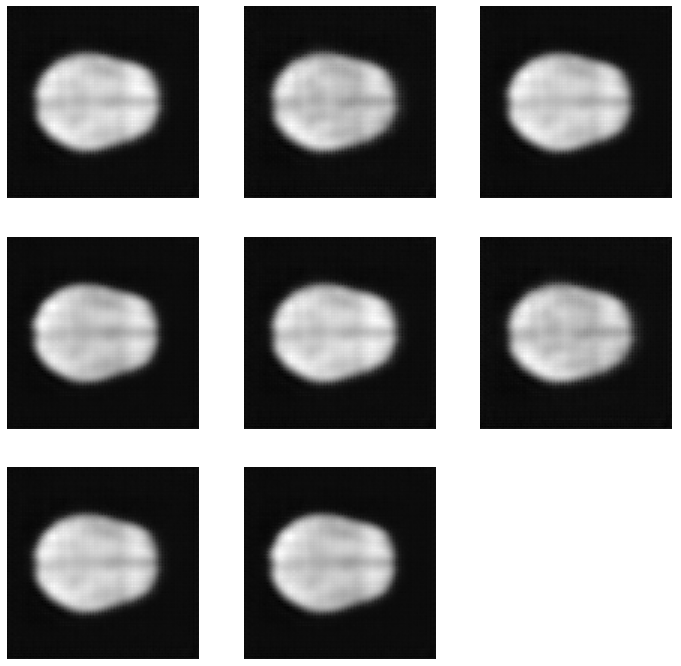

interactive(children=(IntSlider(value=64, description='Slice Index', max=127), Output()), _dom_classes=('widge…

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
import re

def list_files_for_criteria(parent_path, criteria):
    filepaths = []
    for dirpath, dirnames, filenames in os.walk(parent_path):
        for filename in filenames:
            if any(criterion in dirpath for criterion in criteria) and ('epoch400' in filename or 'epoch25' in filename or 'original' in filename):
                filepaths.append(os.path.join(dirpath, filename))
    return filepaths

parent_path = '/N/slate/aajais/reconst-vqvae-monai-scaled-128'
criteria = ['/B12-KR-AUG-all-T-NSVQ-']

# Find files that match the criteria
filepaths = list_files_for_criteria(parent_path, criteria)
print(filepaths)
# Load the images
brain_images = []
labels = []
for filepath in filepaths:
    brain_images.append(np.load(filepath))
    label = 'Original' if 'original' in filepath else 'Epoch '
    labels.append(f"{label}: {os.path.basename(filepath)}")

def plot_brain_slices(slice_index):
    n_images = len(filepaths) + 6
    print(n_images)
    cols = int(np.ceil(np.sqrt(n_images)))
    rows = int(np.ceil(n_images / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

    for i, ax in enumerate(axes.flatten()):
        if i < n_images:
            ax.imshow(brain_images[1][i, :, :, slice_index, 0], cmap='gray')  
#             if i == 0:
#                 ax.set_title(f'Original Brain, Slice {slice_index}')
#             else:
#                 ax.set_title(f'Reconstructed Brain: Epoch {filepaths[i][-6:-4]}, Slice {slice_index}')
#                 ax.set_title(f'Reconstructed image, Slice {slice_index}')
            ax.axis('off')
        else:
            ax.axis('off')  

    plt.show()

# Create a slider widget for slice index
slice_slider = widgets.IntSlider(min=0, max=brain_images[0].shape[3]-1, step=1, value=brain_images[0].shape[3]//2, description='Slice Index')
widgets.interactive(plot_brain_slices, slice_index=slice_slider)


In [2]:
 ! module load python/gpu/3.10.10 

['/N/slate/aajais/reconst-vqvae-monai-scaled-128/B12-KR-AUG-all-T-mask-/0-reconst3d-B12-KR-AUG-all-T-mask--epoch53.npy', '/N/slate/aajais/reconst-vqvae-monai-scaled-128/B12-KR-AUG-all-T-mask-/0-original-B12-KR-AUG-all-T-mask-.npy']
2
(128, 128, 128, 1)
(128, 128)
(128, 128)


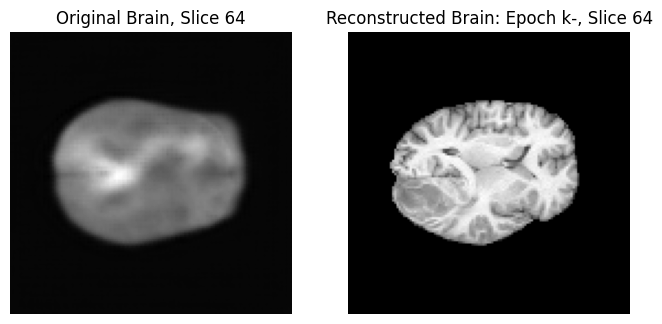

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
import re

def list_files_for_criteria(parent_path, criteria):
    filepaths = []
    for dirpath, dirnames, filenames in os.walk(parent_path):
        for filename in filenames:
            if any(criterion in dirpath for criterion in criteria) and ('epoch53' in filename or 'epoch78' in filename or 'original' in filename):
                filepaths.append(os.path.join(dirpath, filename))
    return filepaths

parent_path = '/N/slate/aajais/reconst-vqvae-monai-scaled-128'
criteria = ['/B12-KR-AUG-all-T-mask-']

# Find files that match the criteria
filepaths = list_files_for_criteria(parent_path, criteria)
print(filepaths)
# Load the images
brain_images = []
labels= []
for filepath in filepaths:
    brain_images.append(np.load(filepath))
    label = 'Original' if 'original' in filepath else 'Epoch '
    labels.append(f"{label}: {os.path.basename(filepath)}")

def plot_brain_slices(slice_index):
    n_images = len(filepaths)
    print(n_images)
    cols = int(np.ceil(np.sqrt(n_images)))
    rows = int(np.ceil(n_images / cols))
    print(brain_images[0][0].shape)
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

    for i, ax in enumerate(axes.flatten()):
        if i < n_images:
            print(brain_images[i][0, :, :, slice_index, 0].shape)
            ax.imshow(brain_images[i][0, :, :, slice_index, 0], cmap='gray')  
            if i == 0:
                ax.set_title(f'Original Brain, Slice {slice_index}')
            else:
                ax.set_title(f'Reconstructed Brain: Epoch {filepaths[i][-6:-4]}, Slice {slice_index}')
#                 ax.set_title(f'Reconstructed image, Slice {slice_index}')
            ax.axis('off')
        else:
            ax.axis('off')  

    plt.show()

# Create a slider widget for slice index
# slice_slider = widgets.IntSlider(min=0, max=brain_images[0].shape[3]-1, step=1, value=brain_images[0].shape[3]//2, description='Slice Index')
# widgets.interactive(plot_brain_slices, slice_index=slice_slider)
plot_brain_slices(64)

In [8]:
pip install numpy matplotlib ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 42.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 51.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
! jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: execute kernel kernelspec migrate nbconvert qtconsole
run troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
